In [1]:
!pip install scikit-image
!pip install skimage

    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pranjali.bobade\\AppData\\Local\\Temp\\pip-install-vklmtnn1\\skimage_779d0c5463c142c18a72fc5d00a0cf36\\setup.py'"'"'; __file__='"'"'C:\\Users\\pranjali.bobade\\AppData\\Local\\Temp\\pip-install-vklmtnn1\\skimage_779d0c5463c142c18a72fc5d00a0cf36\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\pranjali.bobade\AppData\Local\Temp\pip-pip-egg-info-_uzjg3sd'
         cwd: C:\Users\pranjali.bobade\AppData\Local\Temp\pip-install-vklmtnn1\skimage_779d0c5463c142c18a72fc5d00a0cf36\
    Complete output (3 lines):
    
    *** Please install the `scikit-image` package (instead of `skimage`) ***
    
    ----------------------------------------
ERROR: Could not find a version 


  Using cached skimage-0.0.tar.gz (757 bytes)


In [2]:
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [3]:
img= cv2.imread(r"D:\Pranjali\image\kalpana.jpg")
img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #we are converting image to BGR because matplotlib displays image BGR format
#if we are using cv2 for displaying image, no need to convert image to BGR

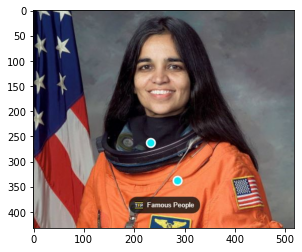

In [4]:
plt.imshow(img)
plt.show()

In [5]:
# Define functions for each operation

def anticlockwise_rotation(image):
    angle= random.randint(0,90)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,90)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(img, (9,9),0)

# warp_shifting distorts image, but can be used in many use cases like classifying blur and non-blur images

def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to our convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

def generated_images(images_to_generate):
    count = images_to_generate * 1
    print(count)
images_to_generate = int( input("Input your images count to generate: "))

Input your images count to generate: 100


In [8]:
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip,
                   'warp shift': warp_shift,
                   'adding noise': add_noise,
                   'blurring image':blur_image
                 }                #use dictionary to store names of functions 

images_path="D:/Pranjali/image" #path to original images
augmented_path="D:/Pranjali/Aumented_Images" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

#images_to_generate = 100             # hardcoded value
generated_images(images_to_generate)  # calling function

i=1                        # variable to iterate till images_to_generate

while i<=images_to_generate:    
    image=random.choice(images)
    original_image = io.imread(image)
    transformed_image=None

    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
    i =i+1
    
print("Number of images generated are by user input {0}".format(images_to_generate))    

100
Number of images generated are by user input 100
